# Assignment 3 - Introduction to Python for Data Science Program
#### **Nama: Ika Nurfitriani**
#### **Kode Peserta: PYTN-KS10-008**

# Short Description of The Assignment
This assignment is a project intended as the **third** assignment in a self-study class at PT Hacktivate Teknologi Indonesia. In this project, we will analyze the Bank Marketing dataset. This assignment is made by taking into account all the assessment rubrics that have been set and will be checked by the teacher of each class.

# Project Overview
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. There are four datasets:
- **bank-additional-full.csv** with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
- **bank-additional.csv** with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
- **bank-full.csv** with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
- **bank.csv** with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

Bank Client Data:
User Details:
   1. `age` (numeric)

   2. `job` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

   3. `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

   4. `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

   5. `default`: has credit in default? (categorical: 'no','yes','unknown')

   6.  `housing`: has housing loan? (categorical: 'no','yes','unknown')

   7. `loan`: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

   8. `contact`: contact communication type (categorical: 'cellular','telephone')

   9. `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

   10. `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

   11. `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

   Other attributes:

   12. `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

   13. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

   14. `previous`: number of contacts performed before this campaign and for this client (numeric)

   15. `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes
   16. `emp.var.rate`: employment variation rate - quarterly indicator (numeric)

   17. `cons.price.idx`: consumer price index - monthly indicator (numeric)

   18. `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)

   19. `euribor3m`: euribor 3 month rate - daily indicator (numeric)

   20. `nr.employed`: number of employees - quarterly indicator (numeric)

Output variable (desired target):

   21. `y` - has the client subscribed a term deposit? (binary: 'yes','no')

# A. Import Required Libraries
***
Di tahap ini, saya mengimpor beberapa library yang dibutuhkan.

In [1]:
# Import library yang dibutuhkan untuk preprocessing dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Import library yang dibutuhkan untuk modelling
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# B. Preparation and Preprocessing Dataset
***
Di tahap ini, data dalam dataset akan melalui berbagai proses untuk memastikan bahwa data siap digunakan untuk dianalisis.

## 1. Data Loading

In [2]:
# Open data
df_bank = pd.read_csv("bank-additional-full.csv", sep=';')

# Menampilkan 5 data pertama dan 5 data terakhir
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# Melihat ringkasan tipe data setiap kolom
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Melihat informasi dimensi dari dataset
rows, columns = df_bank.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
41188 baris
21 kolom


In [5]:
# Melihat range index dataset
df_bank.index

RangeIndex(start=0, stop=41188, step=1)

In [6]:
# Melihat daftar indeks dataset
df_bank.index.values

array([    0,     1,     2, ..., 41185, 41186, 41187], dtype=int64)

In [7]:
# Mengetahui daftar kolom yang ada dalam dataset
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
# Mengelompokkan atribut berdasarkan tipe datanya
numerical_columns = list(df_bank.select_dtypes(include=['int64']).columns.values) + list(df_bank.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(df_bank.select_dtypes(include=['object']))

In [9]:
# Mencetak kolom numerik dan kategori
print("Kolom Numerik: ", numerical_columns)
print("\nKolom Kategorik: ", categorical_columns)

Kolom Numerik:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Kolom Kategorik:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [10]:
# Melihat deskriptif statistik untuk kolom numerik
df_bank[numerical_columns].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 2. Data Cleaning

In [11]:
# Memeriksa kolom kategori dan jumlah masing-masing di setiap fitur
print("Job:",df_bank.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df_bank.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df_bank.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df_bank.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df_bank.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",df_bank.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df_bank.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df_bank.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",df_bank.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df_bank.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",df_bank.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      

In [12]:
# Mengetahui jumlah "unknown" di setiap atribut
df_bank[df_bank[categorical_columns]=='unknown'].count().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

In [13]:
# Mengganti "unknown" dengan Numpy NaN
df_bank[df_bank[categorical_columns]=="unknown"] = np.nan

In [14]:
# Mengecek kembali
df_bank[df_bank[categorical_columns]=='unknown'
].count().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [15]:
# Melihat unstandard missing values pada kolom kategori
df_bank[categorical_columns].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [16]:
# Melihat unstandard missing values pada kolom numerik
df_bank[numerical_columns].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [17]:
# Melihat jumlah data yang unik
df_bank.nunique()

age                 78
job                 11
marital              3
education            7
default              2
housing              2
loan                 2
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [18]:
# Mengganti nilai 999 pada pdays 
df_bank['pdays'].replace(999, 0, inplace=True)

In [19]:
# Merangkum total missing values
print("Jumlah missing values (nan) pada kolom kategori =",df_bank[categorical_columns].isnull().sum().sum())
print("Jumlah missing values (nan) pada kolom numerik =",df_bank[numerical_columns].isnull().sum().sum())

Jumlah missing values (nan) pada kolom kategori = 12718
Jumlah missing values (nan) pada kolom numerik = 0


## 3. Handling Missing Values

In [20]:
# Memisahkan data yang bertipe kategorik dan numerik
# Categorical data
df_bank_cat = df_bank[categorical_columns]

# Numerical data
df_bank_num = df_bank[numerical_columns]

In [21]:
# Instansiasi kelas SimpleImputer untuk imputer atribut kategorikal
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit dengan data training
imputer_categorical.fit(df_bank_cat)

# Transform ke data latih
df_bank_cat = imputer_categorical.transform(df_bank_cat)

# Buat numpy array hasil imputer transform ke dalam dataframe
df_bank_cat = pd.DataFrame(df_bank_cat,columns=categorical_columns)

# Menggabungkan kolom kategori dan numerik
df_bank = pd.concat([df_bank_num,df_bank_cat],axis=1)

In [22]:
# Mengecek kembali jumlah missing values (nan)
print("Jumlah nan missing values atribut kategori = ",df_bank[categorical_columns].isnull().sum().sum())
print("Jumlah nan missing values atribut numerikal = ",df_bank[numerical_columns].isnull().sum().sum())

Jumlah nan missing values atribut kategori =  0
Jumlah nan missing values atribut numerikal =  0


In [23]:
# Mengganti nama kolom 
df_bank.rename(columns={
    'default':'credit default',
    'pdays':'number of days passed',
    'emp.var.rate':'employment variation rate',
    'cons.price.idx':'consumer price index',
    'cons.conf.idx':'consumer confidence index',
    'euribor3m':'euribor 3 month rate',
    'nr.employed':'number of employees',
    'y':'subscribe deposit',
},inplace=True)

# Melihat 5 data pertama dan 5 data terakhir
df_bank

,age,duration,campaign,number of days passed,previous,employment variation rate,consumer price index,consumer confidence index,euribor 3 month rate,number of employees,...,marital,education,credit default,housing,loan,contact,month,day_of_week,poutcome,subscribe deposit
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,...,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,46,383,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,...,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,56,189,2,0,0,-1.1,94.767,-50.8,1.028,4963.6,...,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,44,442,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,...,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


### KESIMPULAN ANALISIS
Pada tahapan di atas saya mengecek missing values, mengganti "unknown" dengan Numpy nan, mengganti nilai 999 pada pdays, menangani missing values serta mengganti nama kolom.

# C. EDA (Data Visualization)
***
Di tahap ini, saya akan melakukan analisa sederhana dengan menggunakan visualisasi.<br>
**Question:**
1. Berapa perbandingan dan presentase dari banyaknya yang berlangganan deposito dan yang tidak berlangganan deposito?
2. Bagaimana visualisasi dari kolom numerik dengan menggunakan histogram?
3. Berapa jumlah orang berdasarkan pekerjaan dan tingkat pendidikan?

**Answer Question 1**

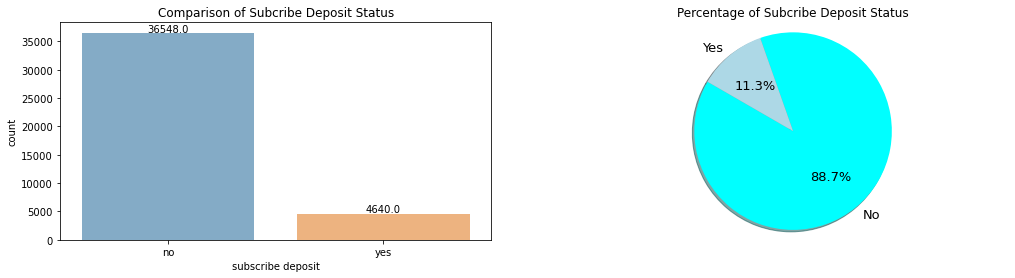

In [24]:
# Membuat 2 grafik secara bersamaan dengan subplot
# Membuat bar plot untuk melihat perbandingan banyaknya yang berlangganan deposito dengan yang tidak
plt.rcParams['figure.figsize']=(17,4)
plt.subplot(121)
plt.title("Comparison of Subcribe Deposit Status")
ax = sns.countplot(x='subscribe deposit', data=df_bank, alpha=0.6)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,4), textcoords='offset points')

# Membuat pie chart untuk melihat presentase banyaknya yang berlangganan deposito dengan yang tidak
plt.subplot(122)
plt.title("Percentage of Subcribe Deposit Status")
subscribed_values_count = df_bank['subscribe deposit'].value_counts()
subscribed_size = subscribed_values_count.values.tolist()
subscribed_labels = 'No', 'Yes'
colors=['aqua', 'lightblue']
pcs, texts, autotexts = plt.pie(subscribed_size, labels=subscribed_labels, colors=colors,
                             autopct='%1.1f%%', shadow=True, startangle=150)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(13)
    autotext.set_fontsize(13)

plt.axis('equal')
plt.show()

**Answer Question 2**

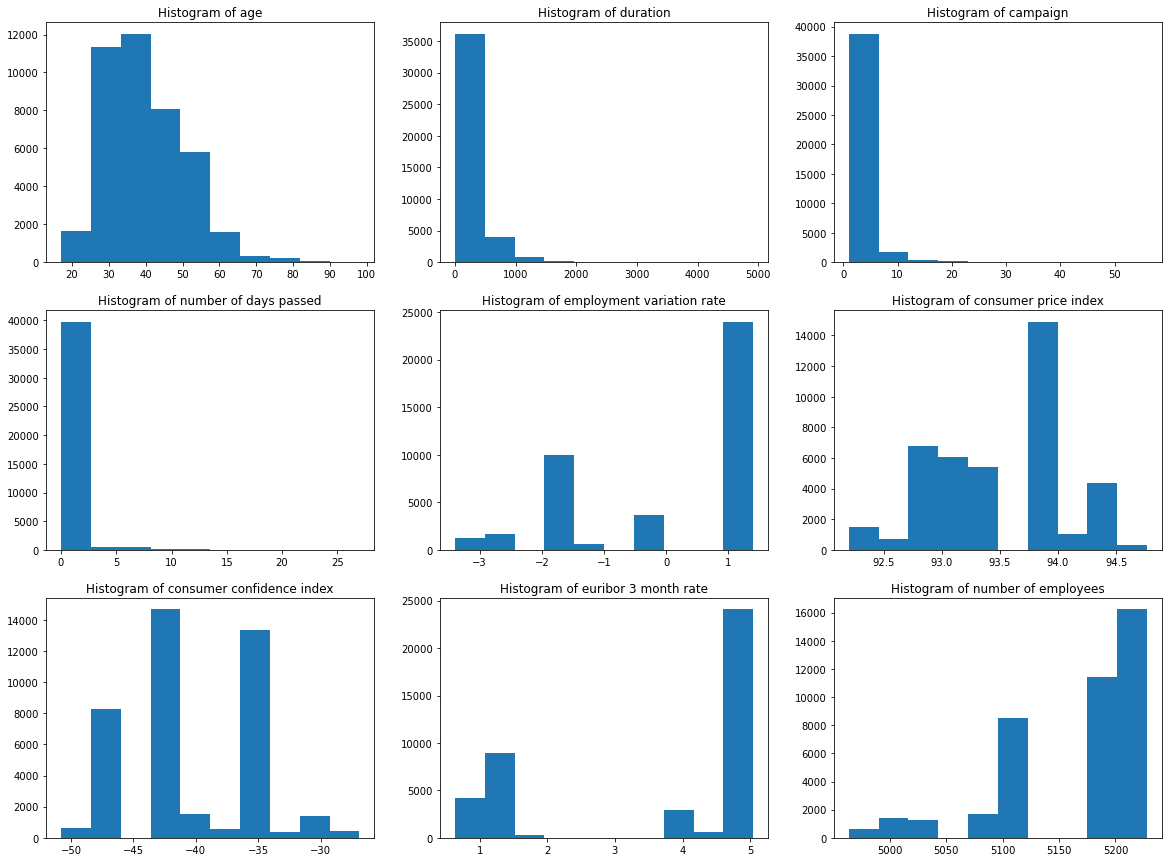

In [25]:
# Memisahkan kolom numerik
numerical_columns = ['age','duration','campaign','number of days passed','employment variation rate','consumer price index','consumer confidence index','euribor 3 month rate','number of employees']

# Membuat histogram untuk kolom numerik
fig, ax = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20,15))
count = 0
for num_col in numerical_columns:
    ax_x = count//3
    ax_y = count%3
    
    ax[ax_x, ax_y].hist(df_bank[num_col])
    ax[ax_x, ax_y].set_title(f"Histogram of {num_col}")
    count+=1
plt.show()

**Answer Question 3**

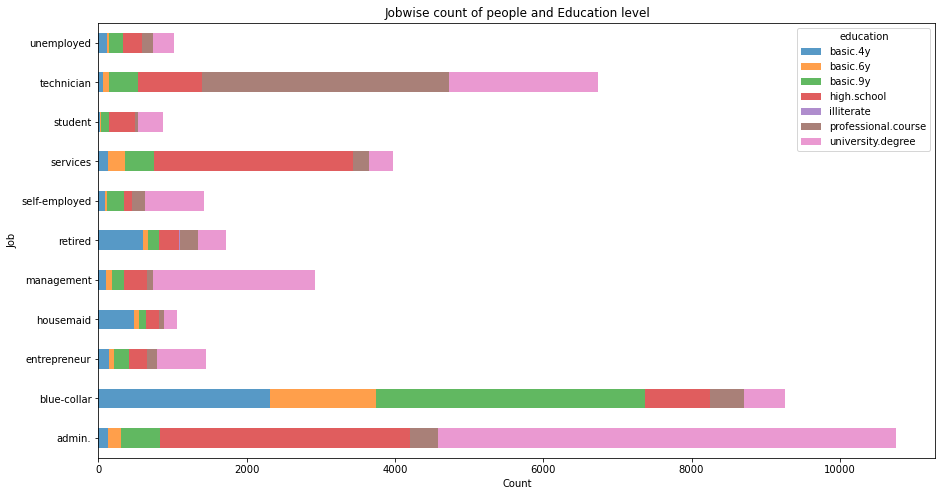

In [26]:
# Membuat pivot table untuk melihat jumlah orang berdasarkan pekerjaan dan tingkat pendidikan
df_pivot = pd.pivot_table(df_bank,columns='education', index='job', aggfunc='count', values='age')
df_pivot.plot(kind='barh', stacked=True , figsize=(15,8), alpha=0.75)
plt.title('Jobwise count of people and Education level')
plt.ylabel('Job')
plt.xlabel('Count')
plt.show()

### KESIMPULAN/ANALISIS JAWABAN:<br>
Berikut kesimpulan yang didapatkan dari hasil visualisasi di atas:
1. Terdapat 36548 yang berlangganan deposito dan 4640 yang tidak berlangganan deposito dengan presentase masing-masing ialah 11.3% dan 88.7%.
2. Untuk hasil visualisasi dari kolom numerik, saya akan mengambil kesimpulan dari kolom Age atau umur. Berdasarkan umur, client dengan umur 40-an adalah terbanyak pertama, disusul dengan client umur 30-an di tempat kedua.
3. Jumlah orang dengan pekerjaan sebagai admin dan jumlah orang dengan tingkat pendidikan gelar universitas menjadi yang terbanyak di kelompoknya masing-masing.

# D. Feature Engineering
***
Di tahap ini, saya akan mengolah kembali data untuk menentukan feature dan target serta membagi data train dan data test sebelum dilakukan modelling.

In [27]:
# Memisahkan kolom numerik
numeric_columns = ['age','duration','campaign','number of days passed','previous','employment variation rate','consumer price index','consumer confidence index','euribor 3 month rate','number of employees']

# Melakukan scaler pada kolom numerik
df_bank[numeric_columns] = StandardScaler().fit_transform(df_bank[numeric_columns])

# Menampilkan 5 data pertama dan 5 data terakhir
df_bank

,age,duration,campaign,number of days passed,previous,employment variation rate,consumer price index,consumer confidence index,euribor 3 month rate,number of employees,...,marital,education,credit default,housing,loan,contact,month,day_of_week,poutcome,subscribe deposit
0,1.533034,0.010471,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,1.628993,-0.421501,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,-0.290186,-0.124520,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,-0.002309,-0.413787,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,1.533034,0.187888,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,-0.164012,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,0.573445,0.481012,-0.565922,-0.164012,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,1.533034,-0.267225,-0.204909,-0.164012,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,0.381527,0.708569,-0.565922,-0.164012,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [28]:
# Melakukan encoder pada kolom kategori
df_bank['job'] = LabelEncoder().fit_transform(df_bank['job'])
df_bank['marital'] = LabelEncoder().fit_transform(df_bank['marital'])
df_bank['education'] = LabelEncoder().fit_transform(df_bank['education'])
df_bank['credit default'] = LabelEncoder().fit_transform(df_bank['credit default'])
df_bank['housing'] = LabelEncoder().fit_transform(df_bank['housing'])
df_bank['loan'] = LabelEncoder().fit_transform(df_bank['loan'])
df_bank['contact'] = LabelEncoder().fit_transform(df_bank['contact'])
df_bank['month'] = LabelEncoder().fit_transform(df_bank['month'])
df_bank['day_of_week'] = LabelEncoder().fit_transform(df_bank['day_of_week'])
df_bank['poutcome'] = LabelEncoder().fit_transform(df_bank['poutcome'])
df_bank['subscribe deposit'] = LabelEncoder().fit_transform(df_bank['subscribe deposit'])

# Menampilkan 5 data pertama
df_bank.head()

,age,duration,campaign,number of days passed,previous,employment variation rate,consumer price index,consumer confidence index,euribor 3 month rate,number of employees,...,marital,education,credit default,housing,loan,contact,month,day_of_week,poutcome,subscribe deposit
0,1.533034,0.010471,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,0,0,0,0,1,6,1,1,0
1,1.628993,-0.421501,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,3,0,0,0,1,6,1,1,0
2,-0.290186,-0.124520,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,3,0,1,0,1,6,1,1,0
3,-0.002309,-0.413787,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,1,0,0,0,1,6,1,1,0
4,1.533034,0.187888,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,1,3,0,0,1,1,6,1,1,0


In [29]:
# Memilih feature sebagai X
X = df_bank.drop('subscribe deposit', axis=1)
# Memilih target sebagai y
y = df_bank['subscribe deposit']

In [30]:
# Splitting data menjadi 70% train dan 30% test
X_train, X_test, y_train, y_test = train_test_split(X , y, shuffle = True, test_size=0.3, random_state=45)

# Mengetahui dimensi data train dan data test
print('Dimensi feature data train =', X_train.shape)
print('Dimensi target data train =', y_train.shape)
print('Dimensi feature data test =', X_test.shape)
print('Dimensi target data test =', y_test.shape)

Dimensi feature data train = (28831, 20)
Dimensi target data train = (28831,)
Dimensi feature data test = (12357, 20)
Dimensi target data test = (12357,)


### KESIMPULAN ANALISIS
Pada tahapan di atas saya melakukan scaler pada kolom numerik, melakukan encoder pada kolom kategori, memilih feature dan target serta melakukan splitting data menjadi 70% data train dan 30% data test. Dimana diperoleh data train 28831 baris dan data test 12357 baris.

# E. Modelling 
***
Di tahap ini, saya akan melakukan modeling menggunakan algoritma Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree, Random Forest dan Naive Bayes.

## 1. Logistic Regression
Di tahap ini, saya akan melakukan implementasi Logistic Regression dan Confusion Matrix menggunakan scikit-learn.

In [31]:
# Implementasi Logistic Regression dan akurasi dengan accuracy score
logreg = LogisticRegression(solver='lbfgs', max_iter=500)
logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)
print("Logistic Regression")
print("Accuracy score :", accuracy_score(y_test, y_pred1))

# Implementasi Confusion Matrix
matrix1=confusion_matrix(y_test, y_pred1)
print("Confusion Matrix :\n", matrix1)

# Melihat hasil akurasi dengan Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred1))

Logistic Regression
Accuracy score : 0.9089584850691915
Confusion Matrix :
 [[10686   278]
 [  847   546]]
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10964
           1       0.66      0.39      0.49      1393

    accuracy                           0.91     12357
   macro avg       0.79      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



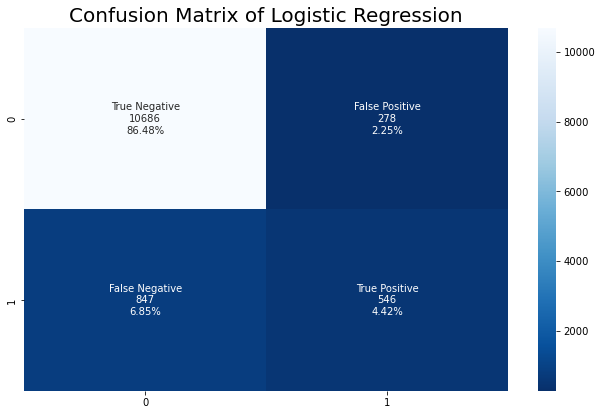

In [32]:
# Membuat labels untuk heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix1.flatten()/np.sum(matrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Membuat heatmap dari Confusion Matrix
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix1, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Logistic Regression", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

### KESIMPULAN ANALISIS
Berdasarkan hasil implementasi Logistic Regression di atas didapatkan bahwa akurasi dengan accuracy score ialah 90.9% atau tepatnya 0.9089584850691915. Kemudian dari confusion matrix didapatkan bahwa True Negative berjumlah 10686 dengan presentase 86.48%, False Positive berjumlah 278 dengan presentase 2.25%, False Negative berjumlah 847 dengan presentase 6.85%, dan True Positive berjumlah 546 dengan presentase 4.42%. Kemudian untuk hasil classification report, akurasi yang didapatkan ialah 91%.

## 2. K-Nearest Neighbors (KNN)
Di tahap ini, saya akan melakukan implementasi K-Nearest Neighbors (KNN) dan Confusion Matrix menggunakan scikit-learn.

In [33]:
# Implementasi K-Nearest Neighbors dan akurasi dengan accuracy score
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
print("K-Nearest Neighbors")
print("Accuracy score :", accuracy_score(y_test, y_pred2))

# Implementasi Confusion Matrix
matrix2=confusion_matrix(y_test, y_pred2)
print("Confusion Matrix :\n", matrix2)

# Melihat hasil akurasi dengan Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred2))

K-Nearest Neighbors
Accuracy score : 0.8949583232176095
Confusion Matrix :
 [[10526   438]
 [  860   533]]
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     10964
           1       0.55      0.38      0.45      1393

    accuracy                           0.89     12357
   macro avg       0.74      0.67      0.70     12357
weighted avg       0.88      0.89      0.89     12357



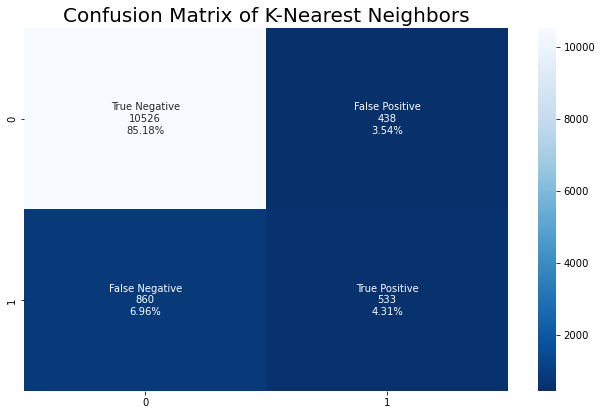

In [34]:
# Membuat labels untuk heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix2.flatten()/np.sum(matrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Membuat heatmap dari Confusion Matrix
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix2, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of K-Nearest Neighbors", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

### KESIMPULAN ANALISIS
Berdasarkan hasil implementasi K-Nearest Neighbors (KNN) di atas didapatkan bahwa akurasi dengan accuracy score ialah 89.5% atau tepatnya 0.8949583232176095. Kemudian dari confusion matrix didapatkan bahwa True Negative berjumlah 10526 dengan presentase 85.18%, False Positive berjumlah 438 dengan presentase 3.54%, False Negative berjumlah 860 dengan presentase 6.96%, dan True Positive berjumlah 533 dengan presentase 4.31%. Kemudian untuk hasil classification report, akurasi yang didapatkan ialah 89%.

## 3. Support Vector Machine (SVM)
Di tahap ini, saya akan melakukan implementasi Support Vector Machine (SVM) dan Confusion Matrix menggunakan scikit-learn.

In [35]:
# Implementasi Support Vector Machine dan akurasi dengan accuracy score
svm = SVC()
svm.fit(X_train, y_train)
y_pred3 = svm.predict(X_test)
print("Support Vector Machine")
print("Accuracy score :", accuracy_score(y_test, y_pred3))

# Implementasi Confusion Matrix
matrix3=confusion_matrix(y_test, y_pred3)
print("Confusion Matrix :\n", matrix3)

# Melihat hasil akurasi dengan Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred3))

Support Vector Machine
Accuracy score : 0.9058833050093065
Confusion Matrix :
 [[10777   187]
 [  976   417]]
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10964
           1       0.69      0.30      0.42      1393

    accuracy                           0.91     12357
   macro avg       0.80      0.64      0.68     12357
weighted avg       0.89      0.91      0.89     12357



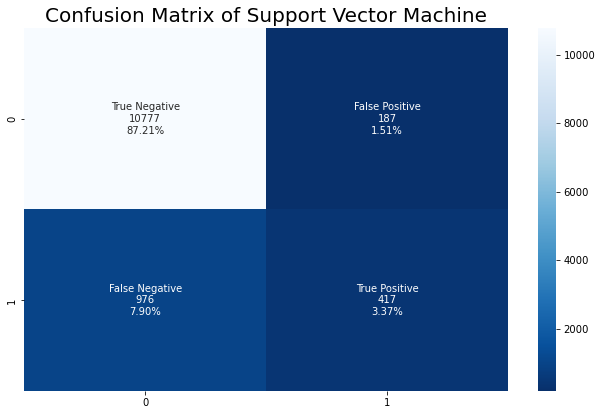

In [36]:
# Membuat labels untuk heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix3.flatten()/np.sum(matrix3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Membuat heatmap dari Confusion Matrix
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix3, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Support Vector Machine", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

### KESIMPULAN ANALISIS
Berdasarkan hasil implementasi Support Vector Machine (SVM) di atas didapatkan bahwa akurasi dengan accuracy score ialah 90.6% atau tepatnya 0.9058833050093065. Kemudian dari confusion matrix didapatkan bahwa True Negative berjumlah 10777 dengan presentase 87.21%, False Positive berjumlah 187 dengan presentase 1.51%, False Negative berjumlah 976 dengan presentase 7.90%, dan True Positive berjumlah 417 dengan presentase 3.37%. Kemudian untuk hasil classification report, akurasi yang didapatkan ialah 91%.

## 4. Decision Tree
Di tahap ini, saya akan melakukan implementasi Decision Tree dan Confusion Matrix menggunakan scikit-learn.

In [37]:
# Implementasi Decision Tree dan akurasi dengan accuracy score
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)
y_pred4 = dectree.predict(X_test)
print("Decision Tree")
print("Accuracy score :", accuracy_score(y_test, y_pred4))

# Implementasi Confusion Matrix
matrix4=confusion_matrix(y_test, y_pred4)
print("Confusion Matrix :\n", matrix4)

# Melihat hasil akurasi dengan Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred4))

Decision Tree
Accuracy score : 0.8891316662620377
Confusion Matrix :
 [[10251   713]
 [  657   736]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.93      0.94     10964
           1       0.51      0.53      0.52      1393

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



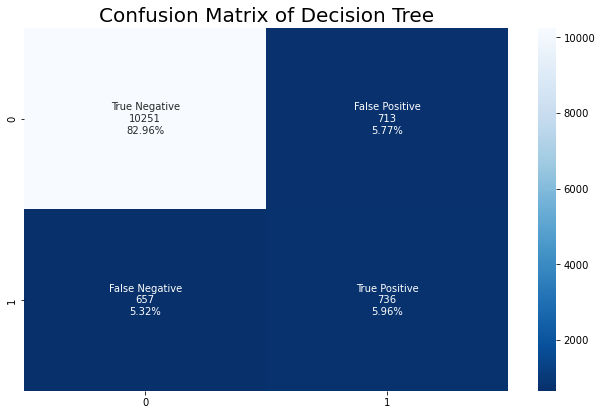

In [38]:
# Membuat labels untuk heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix4.flatten()/np.sum(matrix4)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Membuat heatmap dari Confusion Matrix
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix4, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Decision Tree", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

### KESIMPULAN ANALISIS
Berdasarkan hasil implementasi Decision Tree di atas didapatkan bahwa akurasi dengan accuracy score ialah 89% atau tepatnya 0.8891316662620377. Kemudian dari confusion matrix didapatkan bahwa True Negative berjumlah 10251 dengan presentase 82.96%, False Positive berjumlah 713 dengan presentase 5.77%, False Negative berjumlah 657 dengan presentase 5.32%, dan True Positive berjumlah 736 dengan presentase 5.96%. Kemudian untuk hasil classification report, akurasi yang didapatkan ialah 89%.

## 5. Random Forest
Di tahap ini, saya akan melakukan implementasi Random Forest dan Confusion Matrix menggunakan scikit-learn.

In [39]:
# Implementasi Random Forest dan akurasi dengan accuracy score
ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)
y_pred5 = ranfor.predict(X_test)
print("Random Forest")
print("Accuracy score :", accuracy_score(y_test, y_pred5))

# Implementasi Confusion Matrix
matrix5=confusion_matrix(y_test, y_pred5)
print("Confusion Matrix :\n", matrix5)

# Melihat hasil akurasi dengan Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred5))

Random Forest
Accuracy score : 0.9146232904426641
Confusion Matrix :
 [[10603   361]
 [  694   699]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10964
           1       0.66      0.50      0.57      1393

    accuracy                           0.91     12357
   macro avg       0.80      0.73      0.76     12357
weighted avg       0.91      0.91      0.91     12357



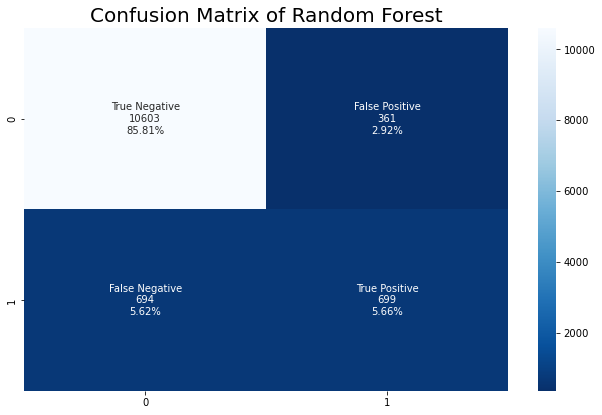

In [40]:
# Membuat labels untuk heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix5.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix5.flatten()/np.sum(matrix5)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Membuat heatmap dari Confusion Matrix
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix5, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Random Forest", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

### KESIMPULAN ANALISIS
Berdasarkan hasil implementasi Random Forest di atas didapatkan bahwa akurasi dengan accuracy score ialah 91.5% atau tepatnya 0.9146232904426641. Kemudian dari confusion matrix didapatkan bahwa True Negative berjumlah 10603 dengan presentase 85.81%, False Positive berjumlah 361 dengan presentase 2.92%, False Negative berjumlah 694 dengan presentase 5.62%, dan True Positive berjumlah 699 dengan presentase 5.66%. Kemudian untuk hasil classification report, akurasi yang didapatkan ialah 91%.

## 6. Naive Bayes
Di tahap ini, saya akan melakukan implementasi Naive Bayes dan Confusion Matrix menggunakan scikit-learn.

In [41]:
# Implementasi Naive Bayes dan akurasi dengan accuracy score
naibay = GaussianNB()
naibay.fit(X_train, y_train)
y_pred6 = naibay.predict(X_test)
print("Naive Bayes")
print("Accuracy score :", accuracy_score(y_test, y_pred6))

# Implementasi Confusion Matrix
matrix6=confusion_matrix(y_test, y_pred6)
print("Confusion Matrix :\n", matrix6)

# Melihat hasil akurasi dengan Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred6))

Naive Bayes
Accuracy score : 0.7175689892368697
Confusion Matrix :
 [[7715 3249]
 [ 241 1152]]
Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.70      0.82     10964
           1       0.26      0.83      0.40      1393

    accuracy                           0.72     12357
   macro avg       0.62      0.77      0.61     12357
weighted avg       0.89      0.72      0.77     12357



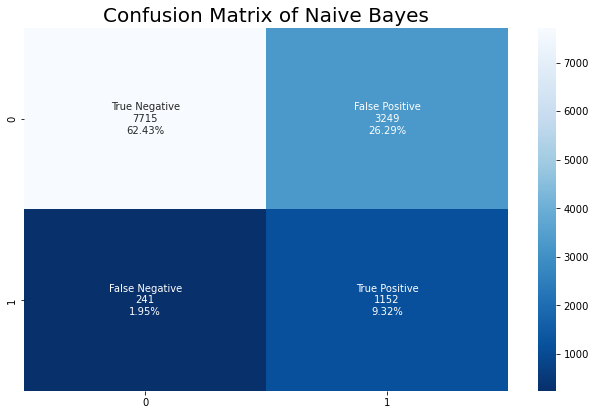

In [42]:
# Membuat labels untuk heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix6.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix6.flatten()/np.sum(matrix6)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Membuat heatmap dari Confusion Matrix
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix6, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Naive Bayes", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

### KESIMPULAN ANALISIS
Berdasarkan hasil implementasi Naive Bayes di atas didapatkan bahwa akurasi dengan accuracy score ialah 71.8% atau tepatnya 0.7175689892368697. Kemudian dari confusion matrix didapatkan bahwa True Negative berjumlah 7715 dengan presentase 62.43%, False Positive berjumlah 3249 dengan presentase 26.29%, False Negative berjumlah 241 dengan presentase 1.95%, dan True Positive berjumlah 1152 dengan presentase 9.32%. Kemudian untuk hasil classification report, akurasi yang didapatkan ialah 72%.

# F. Algorithm Analysis
***

In [45]:
# Menampilkan hasil semua akurasi
print("--- Hasil Semua Akurasi ---")
print("Logistic Regression :", accuracy_score(y_test, y_pred1))
print("K-Nearest Neighbors (KNN) :", accuracy_score(y_test, y_pred2))
print("Support Vector Machine (SVM) :", accuracy_score(y_test, y_pred3))
print("Decision Tree :", accuracy_score(y_test, y_pred4))
print("Random Forest :", accuracy_score(y_test, y_pred5))
print("Naive Bayes :", accuracy_score(y_test, y_pred6))

--- Hasil Semua Akurasi ---
Logistic Regression : 0.9089584850691915
K-Nearest Neighbors (KNN) : 0.8949583232176095
Support Vector Machine (SVM) : 0.9058833050093065
Decision Tree : 0.8891316662620377
Random Forest : 0.9146232904426641
Naive Bayes : 0.7175689892368697


In [44]:
# Menyimpan hasil prediksi pemodelan Random Forest ke file csv
predict = pd.DataFrame(y_pred5, columns=["predictions"]).to_csv("Subscribe_Deposit_Predict_RanFor.csv")

Pada hasil keseluruhan implementasi model di atas, implementasi dengan Random Forest memiliki skor akurasi yang paling tinggi yaitu **91.5%** atau tepatnya 0.9146232904426641. Sedangkan implementasi dengan Naive Bayes memiliki skor akurasi yang paling rendah yaitu **71.8%** atau tepatnya 0.7175689892368697. Karena itu, saya memilih algoritma **Random Forest** untuk membuat model yang memprediksi apakah client akan berlangganan deposito atau tidak (yes/no). Kemudian hasil dari prediksi pemodelan dengan Random Forest saya simpan dalam file csv.